In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
articles = pd.read_csv('articles.csv')
articles.head()


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
articles.tail()


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
105541,959461001,959461,Lounge dress,265,Dress,Garment Full body,1010016,Solid,11,Off White,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Calf-length dress in ribbed jersey made from a...


In [32]:
# get the size of dataframe
print("Rows     : ", articles.shape[0])  # get number of rows/observations
print("Columns  : ", articles.shape[1])  # get number of columns
# get name of columns/features
print("#"*60, "\n", "Features : \n", articles.columns.tolist())
print("#"*60, "\nMissing values :\n\n",
      articles.isnull().sum().sort_values(ascending=False))
print("#"*60, "\nPercent of missing :\n\n", round(articles.isna().sum() /
      articles.isna().count() * 100, 2))  # looking at columns with most Missing Values
print("#"*60, "\nUnique values :  \n\n",
      articles.nunique())  # count of unique values


Rows     :  105542
Columns  :  12
############################################################ 
 Features : 
 ['prod_name', 'product_type_name', 'product_group_name', 'graphical_appearance_name', 'colour_group_name', 'perceived_colour_value_name', 'perceived_colour_master_name', 'department_name', 'index_name', 'index_group_name', 'section_name', 'garment_group_name']
############################################################ 
Missing values :

 prod_name                       0
product_type_name               0
product_group_name              0
graphical_appearance_name       0
colour_group_name               0
perceived_colour_value_name     0
perceived_colour_master_name    0
department_name                 0
index_name                      0
index_group_name                0
section_name                    0
garment_group_name              0
dtype: int64
############################################################ 
Percent of missing :

 prod_name                      0.00
produc

#### Detail Desc is a boring column, can't use that.


In [5]:

articles = articles.drop('detail_desc', axis='columns')
articles.head()


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"


In [6]:
# Through observation, I asked the question, "Whats the difference between index_group_name and index_name?"
articles[articles['index_group_name'] != articles['index_name']].head()


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear"
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


In [7]:
# useless columns :
useless = [
    "department_no",
    "graphical_appearance_no",
    "colour_group_code",
    "index_code",
    "index_group_no",
    "section_no",
    "garment_group_no",
    "perceived_colour_value_id",
    "perceived_colour_master_id",
    "product_type_no",
    "product_code",
    "article_id"
]

articles = articles.drop(useless, axis='columns')
articles.head()


,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name
0,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
1,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
2,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic
3,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"
4,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear"


In [33]:
# Making a list of all categorical variables
cat_col = ['prod_name', 'product_type_name', 'product_group_name',
           'graphical_appearance_name', 'colour_group_name',
           'perceived_colour_value_name', 'perceived_colour_master_name',
           'department_name', 'index_name', 'index_group_name', 'section_name',
           'garment_group_name']


In [34]:

# Printing number of count of each unique value in each column
for column in cat_col:
    print(articles[column].value_counts())
    print("#" * 40)


Dragonfly dress          98
Mike tee                 72
Wow printed tee 6.99     70
1pk Fun                  55
TP Paddington Sweater    54
                         ..
Iaa skirt                 1
IZZY Tee Fancy            1
IZZY KNOT LOOSE TEE+      1
IZZY                      1
Åsa Dress                 1
Name: prod_name, Length: 45875, dtype: int64
########################################
Trousers        11169
Dress           10362
Sweater          9302
T-shirt          7904
Top              4155
                ...  
Bra extender        1
Blanket             1
Towel               1
Wood balls          1
Cushion             1
Name: product_type_name, Length: 131, dtype: int64
########################################
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear               

In [36]:
prod_name_values = pd.DataFrame(articles['prod_name'].value_counts())
product_type_name_values = pd.DataFrame(articles['product_type_name'].value_counts())
product_group_name_values = pd.DataFrame(articles['product_group_name'].value_counts())
graphical_appearance_name_values = pd.DataFrame(articles['graphical_appearance_name'].value_counts())
colour_group_name_values = pd.DataFrame(articles['colour_group_name'].value_counts())
perceived_colour_master_name_values = pd.DataFrame(articles['perceived_colour_master_name'].value_counts())
department_name_values = pd.DataFrame(articles['department_name'].value_counts())
index_name_values = pd.DataFrame(articles['index_name'].value_counts())
index_group_name_values = pd.DataFrame(articles['index_group_name'].value_counts())
section_name_values = pd.DataFrame(articles['section_name'].value_counts())
garment_group_name_values = pd.DataFrame(articles['garment_group_name'].value_counts())


In [9]:

values = [prod_name_values,
product_type_name_values,
product_group_name_values,
graphical_appearance_name_values,
colour_group_name_values,
perceived_colour_master_name_values,
department_name_values,
index_name_values,
index_group_name_values,
section_name_values,
garment_group_name_values]



In [11]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   prod_name                     105542 non-null  object
 1   product_type_name             105542 non-null  object
 2   product_group_name            105542 non-null  object
 3   graphical_appearance_name     105542 non-null  object
 4   colour_group_name             105542 non-null  object
 5   perceived_colour_value_name   105542 non-null  object
 6   perceived_colour_master_name  105542 non-null  object
 7   department_name               105542 non-null  object
 8   index_name                    105542 non-null  object
 9   index_group_name              105542 non-null  object
 10  section_name                  105542 non-null  object
 11  garment_group_name            105542 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [12]:
for i in articles.columns:
    articles[i] = articles[i].astype("category")

articles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   prod_name                     105542 non-null  category
 1   product_type_name             105542 non-null  category
 2   product_group_name            105542 non-null  category
 3   graphical_appearance_name     105542 non-null  category
 4   colour_group_name             105542 non-null  category
 5   perceived_colour_value_name   105542 non-null  category
 6   perceived_colour_master_name  105542 non-null  category
 7   department_name               105542 non-null  category
 8   index_name                    105542 non-null  category
 9   index_group_name              105542 non-null  category
 10  section_name                  105542 non-null  category
 11  garment_group_name            105542 non-null  category
dtypes: category(12)
memory usage: 

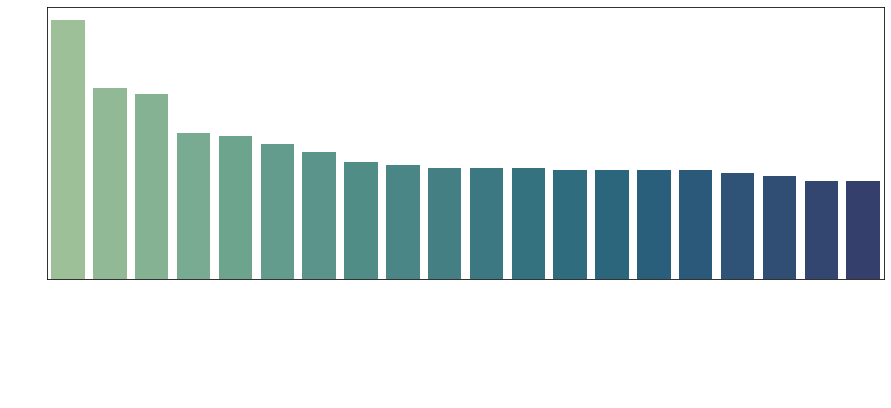

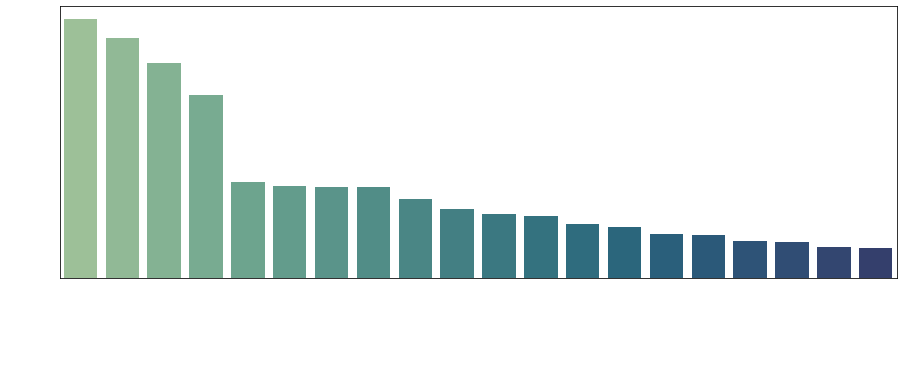

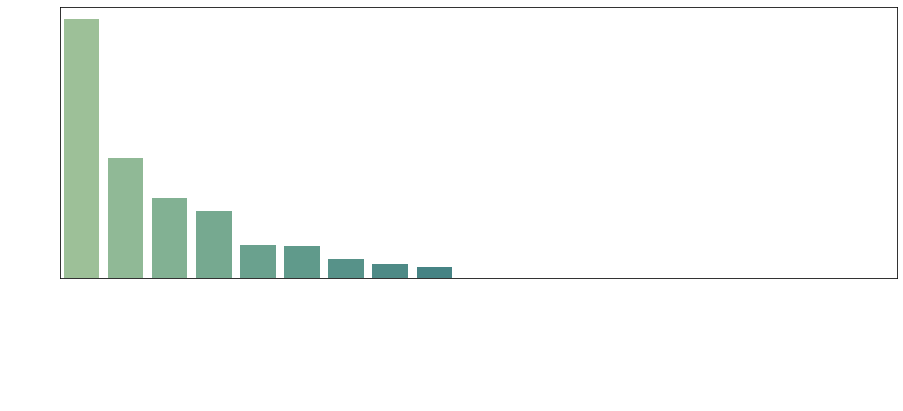

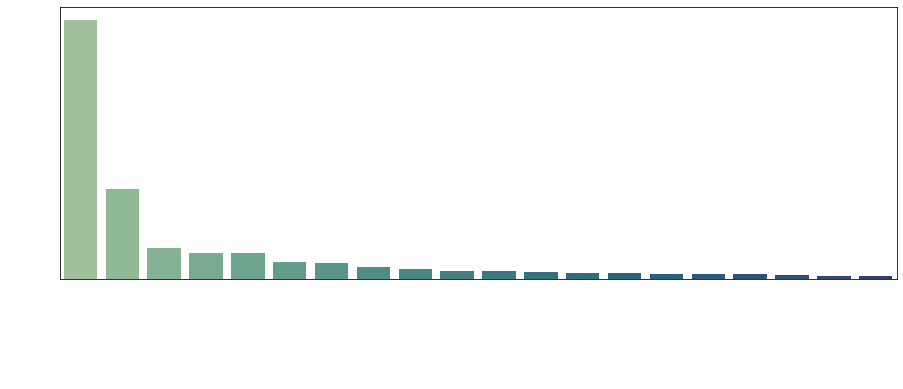

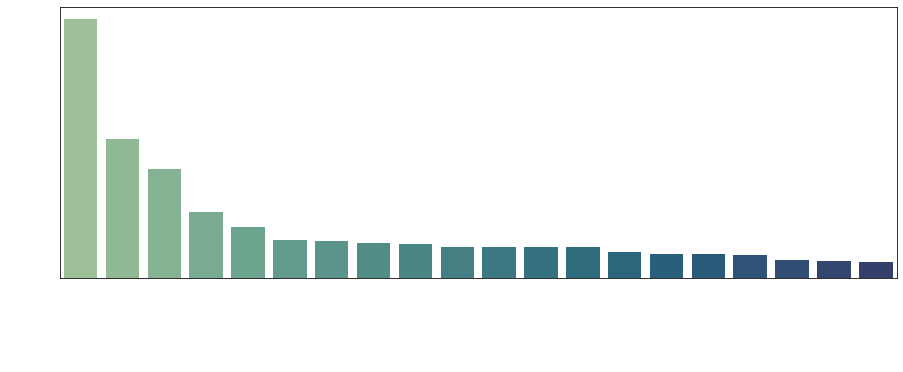

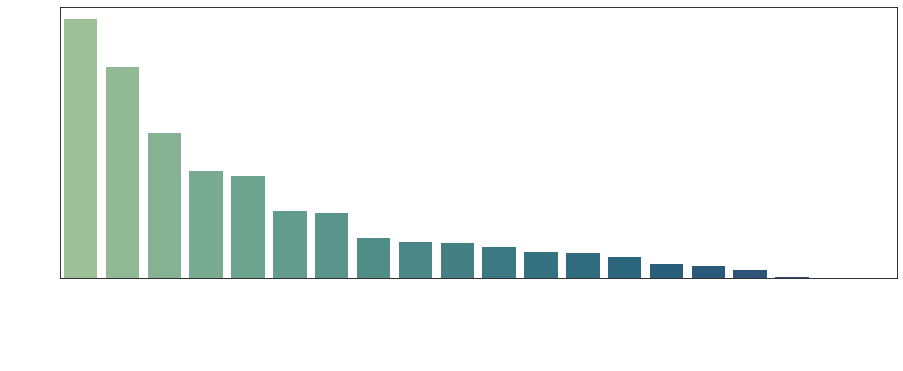

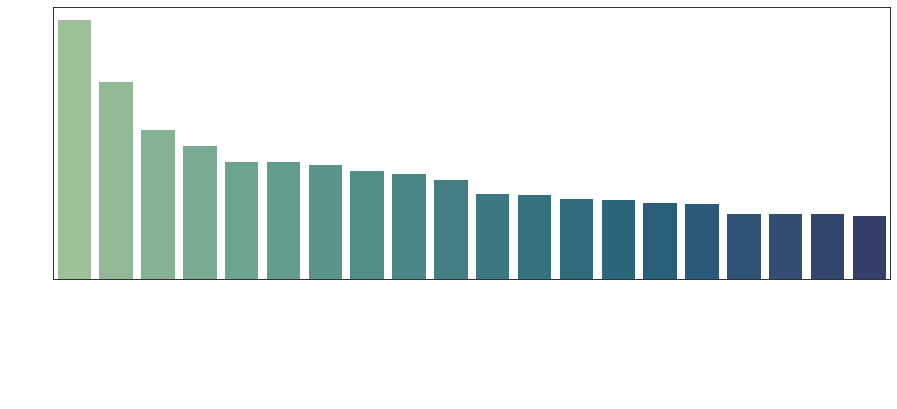

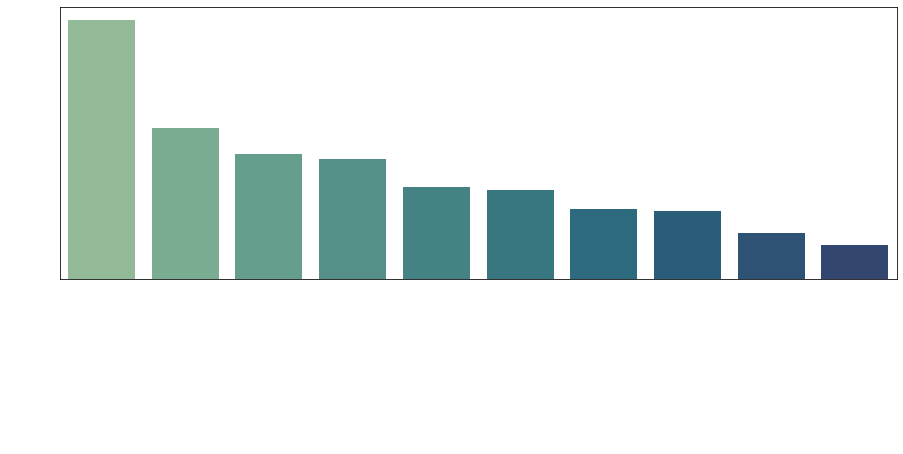

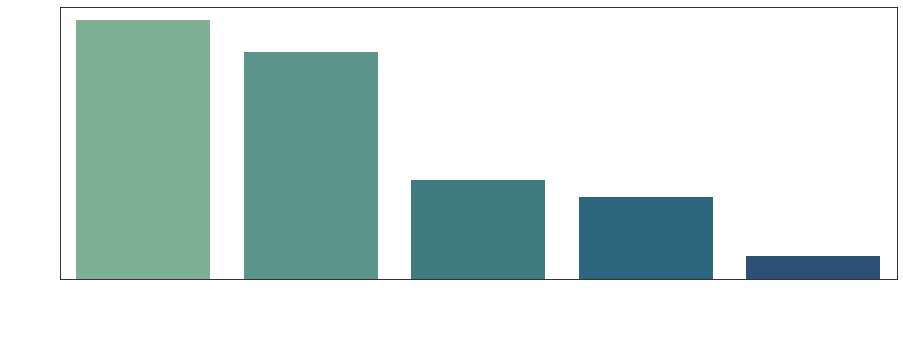

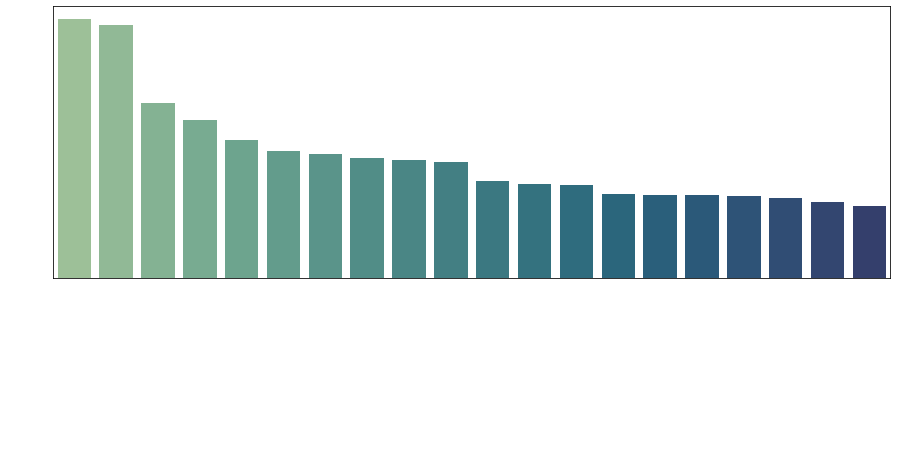

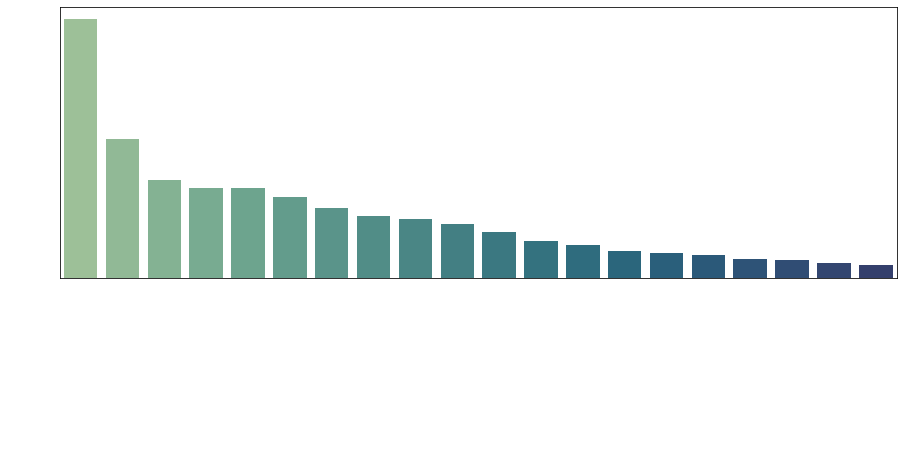

In [23]:
import seaborn as sns

# category_columns = articles.head(20).select_dtypes(include='category').columns.tolist()
for i in values:
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=i.head(20).index, y='Count', data=i.head(20),palette="crest")


In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, 
                      height = 800,
                      background_color ='white',
                      min_font_size = 10,
                      stopwords = stopwords,).generate(' '.join(prod_desc)) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 